# Import Modules
The dwarves!

In [29]:
import digger, gunner, scout 
import pandas as pd
import numpy as np


# Pre-Processing
This segment is a demonstration on how the data cleaning process on the acquired datasets was handled

## Game Datasets

In [30]:

games_review = pd.read_csv("../datasets/videogames/Games.xls")
games_sales = pd.read_csv("../datasets/videogames/vgsales-12-4-2019-short.csv")

games_review_phase1 = digger.slice_column(games_review, "GameName", "Review")
games_review_final = digger.slice_column(games_review, "GameName", "(Import)")

games_merged_dat = digger.write_joined_df(games_sales, games_review_final)

# Acquisition of Merged dataset
print(games_merged_dat.head(5))

   Rank                           Name     Genre ESRB_Rating Platform  \
0   1.0                     Wii Sports    Sports           E      Wii   
1   2.0              Super Mario Bros.  Platform         NaN      NES   
2   3.0                 Mario Kart Wii    Racing           E      Wii   
3   4.0  PlayerUnknown's Battlegrounds   Shooter         NaN       PC   
4   5.0              Wii Sports Resort    Sports           E      Wii   

          Publisher         Developer  Critic_Score  User_Score  \
0          Nintendo      Nintendo EAD           7.7         NaN   
1          Nintendo      Nintendo EAD          10.0         NaN   
2          Nintendo      Nintendo EAD           8.2         9.1   
3  PUBG Corporation  PUBG Corporation           NaN         NaN   
4          Nintendo      Nintendo EAD           8.0         8.8   

   Total_Shipped  Global_Sales  NA_Sales  PAL_Sales  JP_Sales  Other_Sales  \
0          82.86           NaN       NaN        NaN       NaN          NaN   
1 

## Crime Datasets

In [31]:

crime_CA = pd.read_excel("../datasets/crime/clean_crime_canada_dataset.xlsx")

crime_US = pd.read_csv("../datasets/crime/report.csv")

NA_col_list = [
    "JP_Sales",
    "Other_Sales",
    "Global_Sales",
    "GameName",
    "Review",
    "Console",
    "Score",
]

In [32]:

print(crime_US.isnull().count())
print(crime_CA.isnull().count())

year_interval = gunner.year_interval(crime_US, crime_CA, "report_year", "year")

year_max = year_interval[0]
year_min = year_interval[1]

crime_intersect = gunner.intersect_by_year(crime_US, crime_CA, "report_year", "year")

crime_US_intersect = crime_intersect[0]
crime_CA_intersect = crime_intersect[1]

report_year            2829
agency_code            2829
agency_jurisdiction    2829
population             2829
violent_crimes         2829
homicides              2829
rapes                  2829
assaults               2829
robberies              2829
months_reported        2829
crimes_percapita       2829
homicides_percapita    2829
rapes_percapita        2829
assaults_percapita     2829
robberies_percapita    2829
sum_violence           2829
dtype: int64
year             4664
location         4664
type_of_crime    4664
incidents        4664
rate_per_100k    4664
incident_sum     4664
dtype: int64


In [33]:

games_merged_dat = gunner.drop_kick(NA_col_list, games_merged_dat)
games_merged_dat.to_csv("../datasets/videogames/games_merged.csv", index=False)

sale_tri_split = gunner.trisect_by_year(games_merged_dat, "Year", year_interval)

games_sales_split_pre = sale_tri_split[0]
games_sales_split_dur = sale_tri_split[1]
games_sales_split_pos = sale_tri_split[2]

In [34]:

print("Acquired Datasets:\n")
print(sale_tri_split[0].head(5), sale_tri_split[1].head(5), sale_tri_split[2].head(5))

print("Dataset Info:\n")
sale_tri_split[0].info()
sale_tri_split[1].info()
sale_tri_split[2].info()


print("Dataset Info:\n")
games_sales_split_pre.info()
games_sales_split_dur.info()
games_sales_split_pos.info()

print("Yer forsaken Statistical Description:\n", games_sales_split_dur.describe())

print(
    games_sales_split_pre.head(5),
    games_sales_split_dur.head(5),
    games_sales_split_pos.head(5),
)

Acquired Datasets:

    Rank                                Name         Genre ESRB_Rating  \
1    2.0                   Super Mario Bros.      Platform         NaN   
5    6.0  Pokemon Red / Green / Blue Version  Role-Playing           E   
7    8.0                              Tetris        Puzzle           E   
10  11.0                           Duck Hunt       Shooter         NaN   
18  19.0                   Super Mario World      Platform           E   

   Platform Publisher              Developer  Critic_Score  User_Score  \
1       NES  Nintendo           Nintendo EAD          10.0         NaN   
5        GB  Nintendo             Game Freak           9.4         NaN   
7        GB  Nintendo  Bullet Proof Software           NaN         NaN   
10      NES  Nintendo          Nintendo R&D1           NaN         NaN   
18     SNES  Nintendo           Nintendo EAD           8.5         NaN   

    Total_Shipped  NA_Sales  PAL_Sales    Year  
1           40.24       NaN        NaN  1

In [35]:
# Load merged gammas

# Required to use binning for cleaning
gammas = pd.read_csv("../datasets/videogames/games_merged.csv")
labels = ["smol", "epik", "larg"]
gammas = digger.slam_dunk(gammas, "Critic_Score", labels=labels)

# Also need to transform using Z-score (normal distr go brrrr lmao), or min-max
# ah, scheiße
gammas['Critic_Score_Norm'] = scout.scaling_zscore(gammas, 'Critic_Score')
print(gammas['Critic_Score_Norm'].head(10))

# Saving all into a file
gammas = gammas.dropna(how="any", axis=0)  # nuke them empty poopers
gammas.to_csv("../datasets/videogames/games_cleanish.csv", index=False)


# Need similarity and dissimialrity, scipy time
# Selecting 5 random rows
chosen_idx = np.random.choice(len(gammas), replace = False, size = 5)
sample_rows = gammas.iloc[chosen_idx]
print(sample_rows.head())

scout.dissimilarity(sample_rows)

min: 

C:\Users\hellom\AppData\Local\Temp\ipykernel_12888\2916340334.py:4: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  gammas = pd.read_csv("../datasets/videogames/games_merged.csv")


 1.0  max:  10.0
0    0.399535
1    2.335800
2    0.820462
3    0.736276
4    0.652091
5    1.830687
6    1.578131
7    1.367667
8    1.157204
9    2.335800
Name: Critic_Score_Norm, dtype: float64
        Rank                                    Name      Genre ESRB_Rating  \
262    263.0                         Resident Evil 2     Action           M   
1469  1470.0          Metal Gear Rising: Revengeance     Action           M   
1041  1042.0         Tom Clancy's Rainbow Six: Vegas    Shooter           T   
5135  5136.0      Eternal Darkness: Sanity's Requiem  Adventure           M   
6048  6049.0  Teenage Mutant Ninja Turtles: Smash-Up   Fighting         E10   

     Platform                     Publisher         Developer  Critic_Score  \
262        PS                        Capcom            Capcom           9.3   
1469      PS3  Konami Digital Entertainment     PlatinumGames           9.0   
1041     X360                       Ubisoft  Ubisoft Montreal           8.8   
5135       G

# Plotting
Engineer.py steps up to the job

## Importing and setting up environment

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy import count_nonzero

games_pre = games_sales_split_pre
games_dur = games_sales_split_dur
games_pos = games_sales_split_pos

crime_US = crime_US_intersect
crime_CA = crime_CA_intersect

custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style = 'ticks', rc = custom_params)

### Game Sales pre 2000s

#### General Plot

C:\Users\hellom\AppData\Local\Temp\ipykernel_12888\2832375763.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  games_fig_pre = sns.histplot(data = games_pre, x = "Year", palette = sns.color_palette("flare"), kde = True)


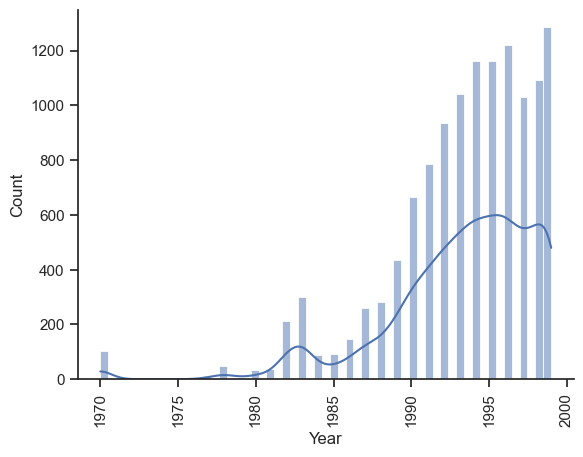

In [37]:

plt.xticks(rotation = 90)
games_fig_pre = sns.histplot(data = games_pre, x = "Year", palette = sns.color_palette("flare"), kde = True)
plt.show()

#### According to Genre

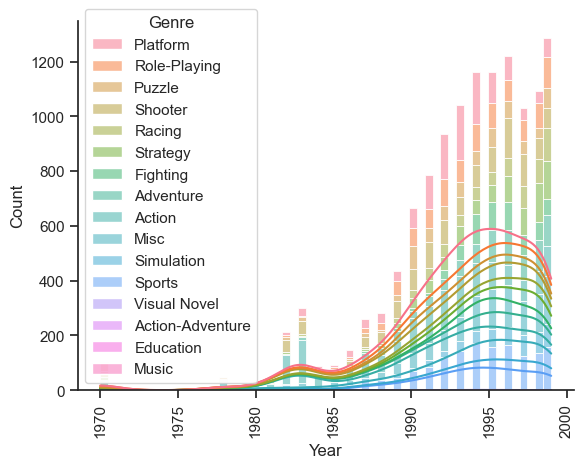

In [38]:

plt.xticks(rotation = 90)
games_fig2_pre = sns.histplot(data = games_pre, x = "Year", hue = "Genre", multiple = "stack", kde = True)
plt.show()

## Game Sales during 2000s

#### General Plot

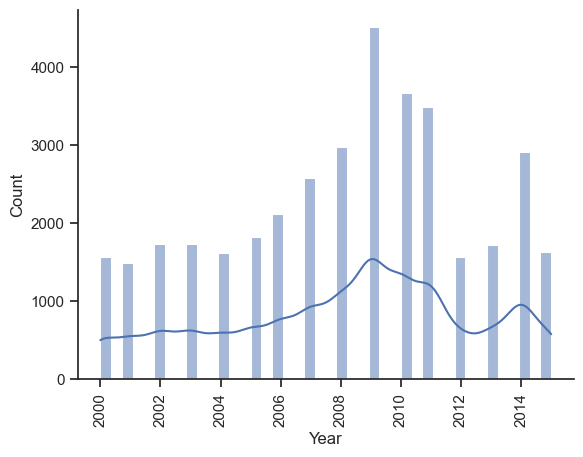

In [39]:

plt.xticks(rotation = 90)
games_fig_dur = sns.histplot(data = games_dur, x = "Year", kde = True)
plt.show()


#### According to Genre

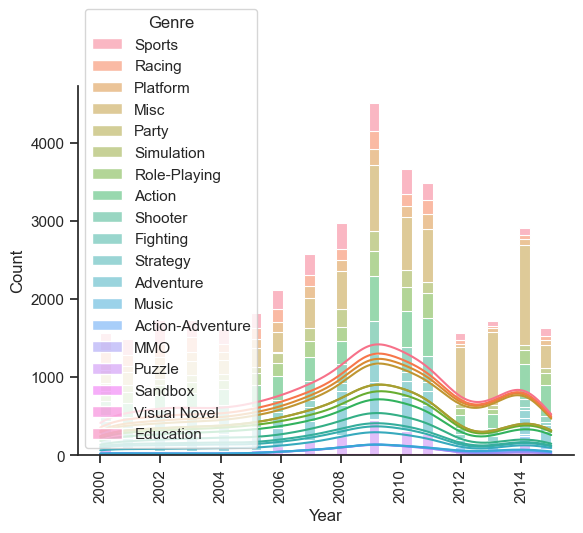

In [40]:

plt.xticks(rotation = 90)
games_fig2_dur = sns.histplot(data = games_dur, x = "Year", hue = "Genre", multiple = "stack", kde = True)
plt.show()

## Crime in Canada and US

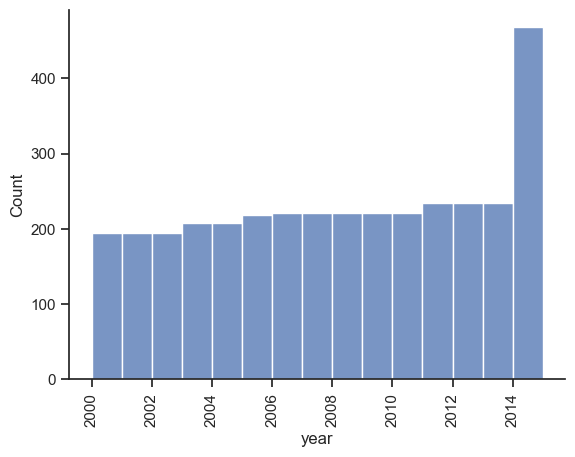

In [41]:

plt.xticks(rotation = 90)
crime_CA_fig = sns.histplot(data = crime_CA, x = "year")
plt.show()

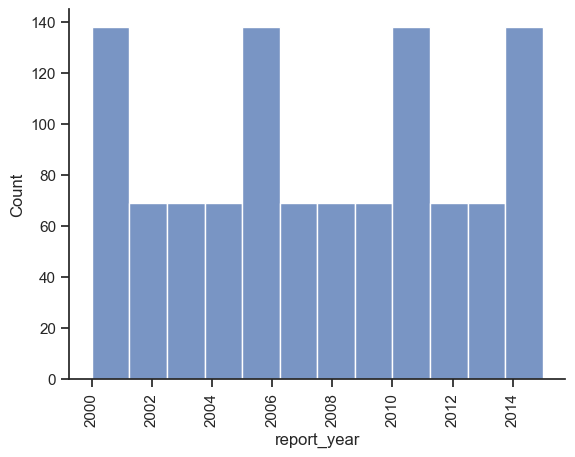

In [42]:

plt.xticks(rotation = 90)
crime_US_fig = sns.histplot(data = crime_US, x = "report_year")
plt.show()

## Integrating violence crimes column into Game sales  
- Note: multiplying sales by 1000 because they're reduced by default
- to plot later

In [43]:
games_dur['Violent_US'] = crime_US['violent_crimes']
games_dur['NA_Sales'] = games_dur['NA_Sales'].multiply(1000)

C:\Users\hellom\AppData\Local\Temp\ipykernel_12888\2268265722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_dur['Violent_US'] = crime_US['violent_crimes']
C:\Users\hellom\AppData\Local\Temp\ipykernel_12888\2268265722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_dur['NA_Sales'] = games_dur['NA_Sales'].multiply(1000)


### Plotting Sales against Crime with Relplot

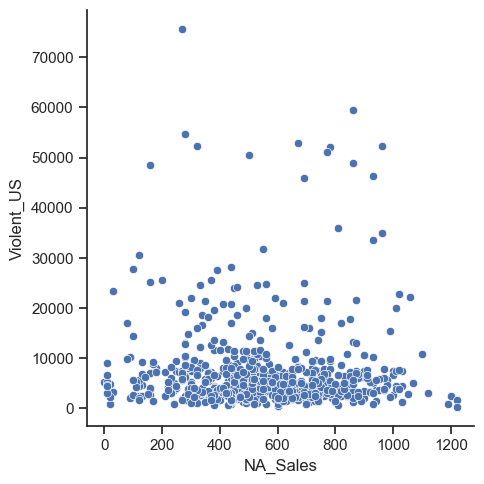

In [44]:
plt.xticks(rotation = 90)
games_violence_US = sns.relplot(data = games_dur, x = 'NA_Sales', y = 'Violent_US')
plt.close(1)

## Joined Plot and Histograms

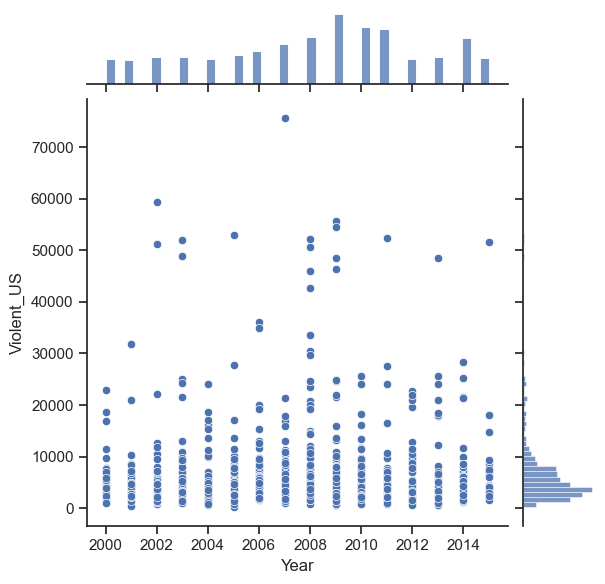

In [45]:
plt.xticks(rotation = 90)
games_crime_dur = sns.jointplot(data = games_dur, x = "Year", y = 'Violent_US')
plt.close(1)

# Kmeans
This executes the kmeans algorithm on the Critic/User scores and total units shipped for video games

In [46]:
from sklearn.cluster import KMeans
from sklearn import metrics
gammas_train_kmeans = KMeans(n_clusters=10, random_state=420, n_init="auto").fit(
    gammas[["Critic_Score", "User_Score", "Total_Shipped"]]
)
gammas_labels = gammas_train_kmeans.labels_

silh_score = metrics.silhouette_score(
    gammas[["Critic_Score", "User_Score", "Total_Shipped"]],
    gammas_labels,
    metric="euclidean",
)
print(silh_score)
gammas["Kmean_Labels"] = gammas_labels
gammas["Kmean_Labels"]
# print(gammas_train.head())

0.27944729305334054


19       4
20       4
21       4
24       4
25       4
        ..
55090    6
55423    8
55490    6
55528    6
55653    6
Name: Kmean_Labels, Length: 6116, dtype: int32

# Splitting

In [47]:
from sklearn.model_selection import train_test_split
# gammas = pd.read_csv("../datasets/videogames/games_cleanish.csv")
gammas_train, gammas_test = train_test_split(gammas, test_size=0.20, random_state=69)

# Naive Bayes
Using the classifier on the video game data set

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
silly_columns = ["Critic_Score", "User_Score", "Total_Shipped"]
prediction = gnb.fit(X=gammas_train[silly_columns], y=gammas_train["Kmean_Labels"]).predict(gammas_test[silly_columns])
len(prediction)
y_test = gammas_test["Kmean_Labels"]
len(y_test)
print("Number of mislabeled points out of a total %d points : %d"
   % (gammas_test.shape[0], (y_test != prediction).sum()))


Number of mislabeled points out of a total 1224 points : 56


# L'Arbre De Decisions

Making tree

In [53]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [80]:
# Columnising dataset
node_cols = ["ESRB_Rating", "Platform"]

gammas.loc[gammas["Critic_Score"] < 5, 'Critic_Score'] = 0
gammas.loc[gammas["Critic_Score"] > 5, 'Critic_Score'] = 1

# print(gammas.head)

# Columns to be considered as nodes
to_be_nodes = gammas[node_cols]




le = preprocessing.LabelEncoder()
# Attribute to be predicted
predikt_col = le.fit_transform(gammas["Critic_Score"])

to_be_nodes["ESRB_Rating"] = le.fit_transform(gammas["ESRB_Rating"])
to_be_nodes["Platform"] = le.fit_transform(gammas["Platform"])

print(to_be_nodes)

print(to_be_nodes["ESRB_Rating"].value_counts())
print(to_be_nodes["Platform"].value_counts())

       ESRB_Rating  Platform
19               3        17
20               3        18
21               0         2
24               0         0
25               0         2
...            ...       ...
55090            3        14
55423            1        12
55490            3        12
55528            0        12
55653            5        18

[6116 rows x 2 columns]
0    2178
5    1910
3    1187
1     834
4       5
2       2
Name: ESRB_Rating, dtype: int64
14    724
29    619
17    485
20    401
16    374
5     370
27    334
7     328
19    312
2     311
31    310
15    260
1     216
0     197
30    129
12    117
18    103
9      99
26     80
28     77
25     67
32     56
11     45
3      33
4      19
24     17
22     16
6       6
21      6
23      2
8       1
13      1
10      1
Name: Platform, dtype: int64


C:\Users\hellom\AppData\Local\Temp\ipykernel_12888\2104622695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_nodes["ESRB_Rating"] = le.fit_transform(gammas["ESRB_Rating"])
C:\Users\hellom\AppData\Local\Temp\ipykernel_12888\2104622695.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_nodes["Platform"] = le.fit_transform(gammas["Platform"])


In [81]:
# Chopping down trees
node_train, node_test, predikt_train, predikt_test = train_test_split(to_be_nodes, predikt_col, test_size = 0.2, random_state =69)
predikt_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
classifier_obj = DecisionTreeClassifier()

classifier_obj = classifier_obj.fit(node_train, predikt_train)

predikt_result = classifier_obj.predict(node_test)

print("ACCURACY FOR MODEL PRE: ", metrics.accuracy_score(predikt_test, predikt_result))

ACCURACY FOR MODEL PRE:  0.9869281045751634


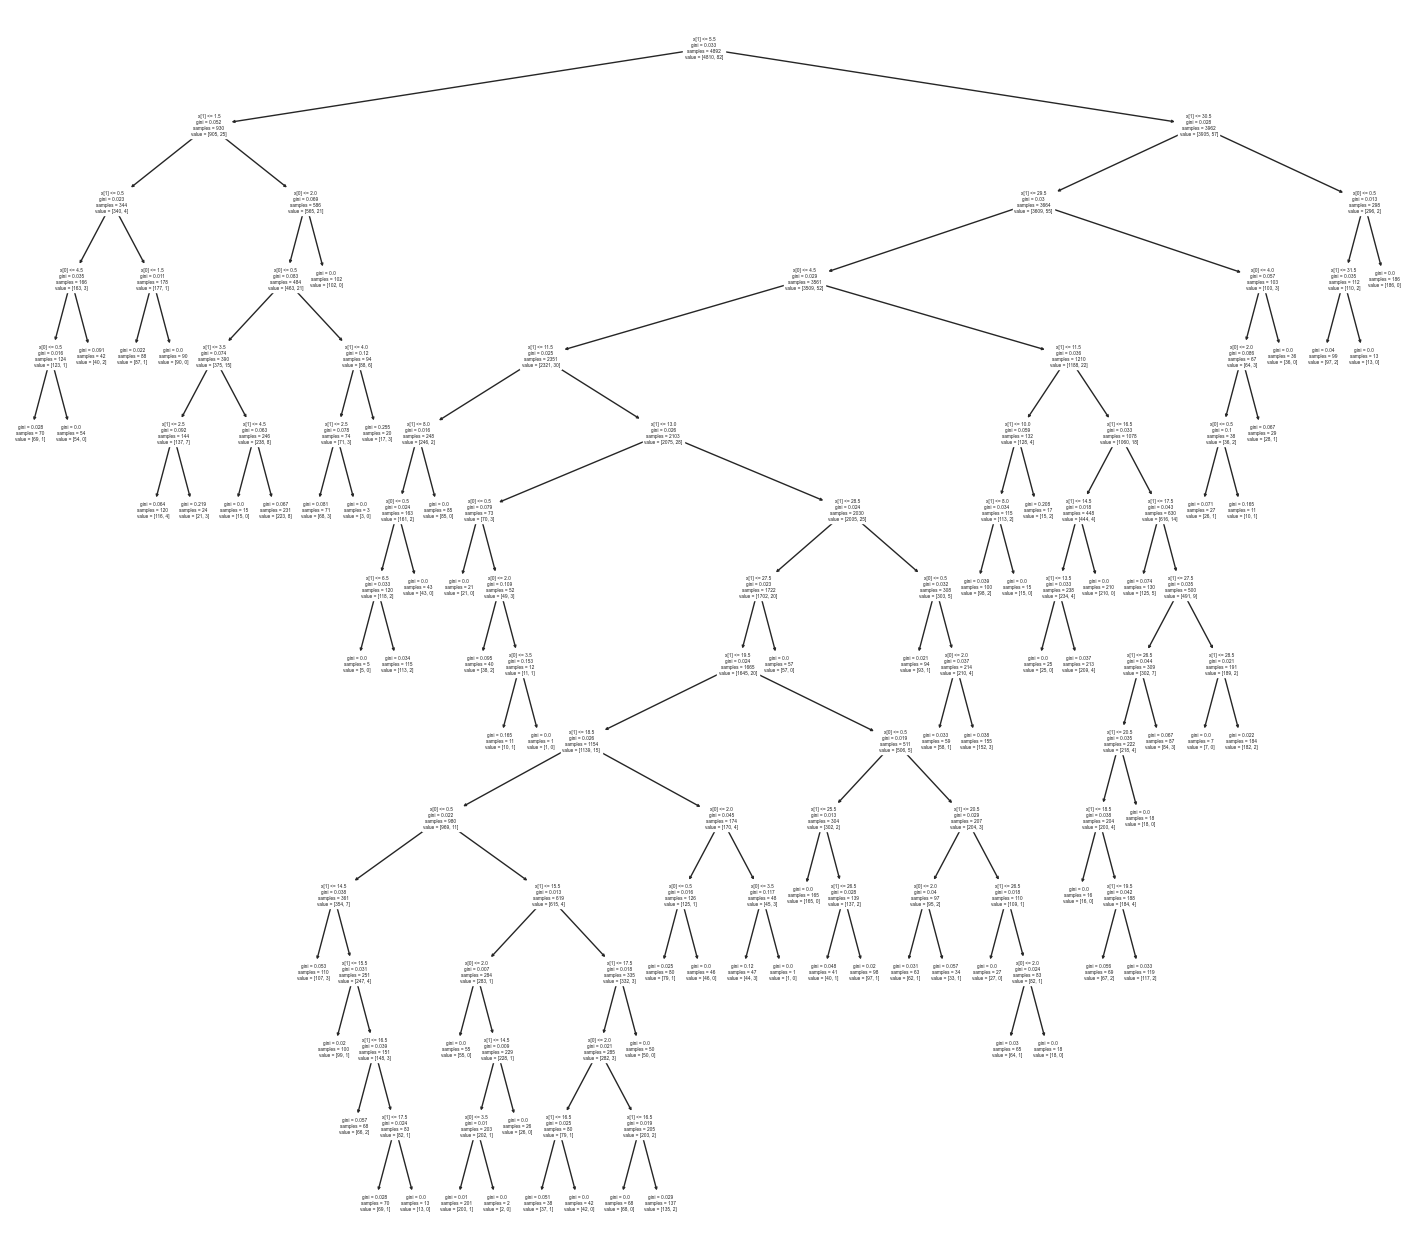

In [83]:
# Visualising L'arbre
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(18,16))
tree.plot_tree(classifier_obj)
plt.savefig('tre.png', dpi=300)
plt.show()